In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "Datasets/stars.csv")

df_stars = pd.read_csv("Datasets/stars.csv")
df_names = df_stars.columns
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
colors = plt.cm.tab10(range(len(class_names)))
color_map = dict(zip(class_names, colors))
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


In [3]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,Blue,O
236,30839,834042.000000,1194.0000,-10.63,1,Blue,O
237,8829,537493.000000,1423.0000,-10.73,1,White,A
238,9235,404940.000000,1112.0000,-11.23,1,White,A


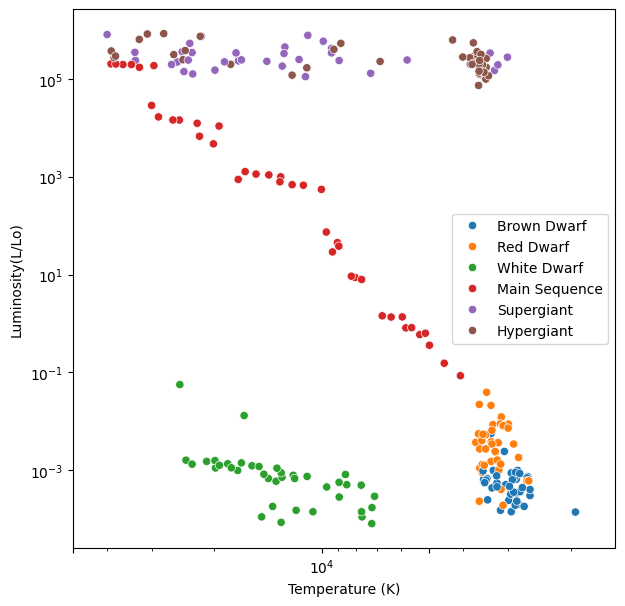

In [ ]:
import seaborn as sns
# plotting the HR diagram
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

In [5]:
if(not df_stars[df_names[0:4]].isnull().values.any()):
    print('There are no Nan elements')
else:
    print('There are some Nan elements')
print('Printing only the numerical values used for the PCA')
df_stars[df_names[0:4]]


There are no Nan elements
Printing only the numerical values used for the PCA


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [ ]:
from sklearn.decomposition import PCA

# doing the PCA
for num_feats in np.arange(1,5, dtype = int):
    pca = PCA(n_components=num_feats)
    pca.fit(df_stars[df_names[0:4]])
    if (sum(pca.explained_variance_ratio_)>0.999):
        break
print(f'{num_feats:d} features are needed to explain 99.9% of the variance')

stars_reduced = pca.transform(df_stars[df_names[0:4]])
pca_comp = pca.components_
evals = pca.explained_variance_ratio_ 
print(evals)

2 features are needed to explain 99.9% of the variance
[0.99760631 0.0023879 ]


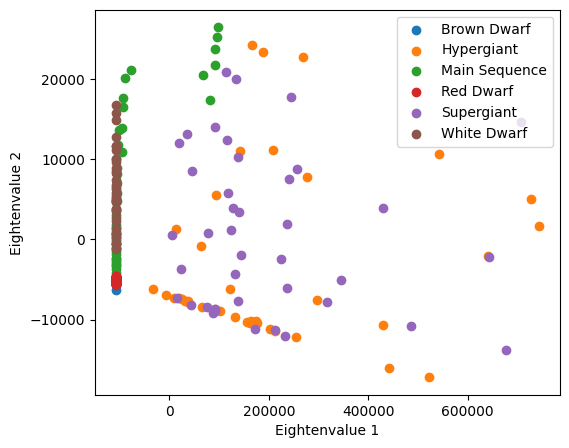

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,5))
# plotting the PCA results, it doesn't look really nice
for category in class_names:
    ax.scatter(stars_reduced[labels==category,0],stars_reduced[labels==category,1],c=[color_map[category]],label=category)
ax.set(xlabel='Eightenvalue 1', ylabel='Eightenvalue 2')
ax.legend()

4 features are needed to explain 99.5% of the variance in the scaled datas
[0.60357391 0.23500784 0.09329645 0.0681218 ]


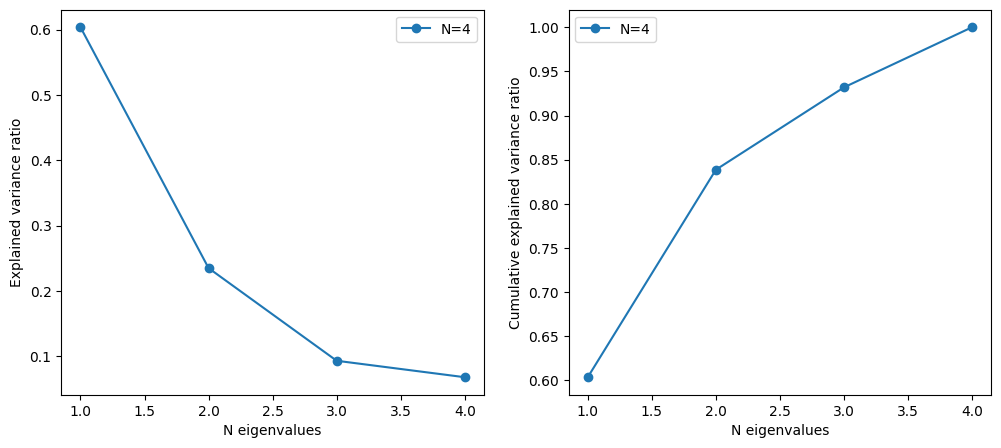

In [ ]:
from sklearn.preprocessing import StandardScaler
# trying scaling the datas before doing PCA
scaler = StandardScaler()
scaler.fit(df_stars[df_names[0:4]])
stars_scaled = scaler.transform(df_stars[df_names[0:4]])
fig,ax=plt.subplots(1,2,figsize=(12,5))

for num_feats in np.arange(1,5, dtype = int):
    pca = PCA(n_components=num_feats)
    pca.fit(stars_scaled)
    evals = pca.explained_variance_ratio_ 
    pca_comp = pca.components_
    if (sum(pca.explained_variance_ratio_)>0.995):
        ax[0].plot(range(1,1+num_feats),evals,marker='o',label='N={:d}'.format(num_feats))
        ax[0].set(xlabel='N eigenvalues',ylabel='Explained variance ratio')
        ax[0].legend()
        ax[1].plot(range(1,1+num_feats),evals.cumsum(),marker='o',label='N={:d}'.format(num_feats))
        ax[1].set(xlabel='N eigenvalues',ylabel='Cumulative explained variance ratio')
        ax[1].legend()
        break

print("{:d} features are needed to explain 99.5% of the variance in the scaled datas".format(num_feats))

stars_reduced = pca.transform(stars_scaled)

print(evals)

The first two components explain 83.86% of the variance


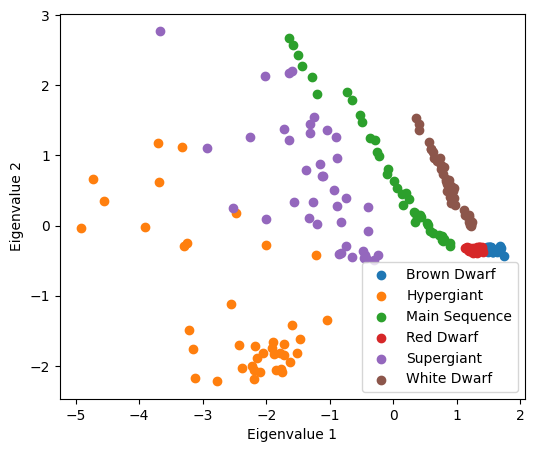

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,5))
# plotting the results for the first two features
for category in class_names:
    ax.scatter(stars_reduced[labels==category,0],stars_reduced[labels==category,1],c=[color_map[category]],label=category)
ax.set(xlabel='Eigenvalue 1', ylabel='Eigenvalue 2')
ax.legend()
print('The first two components explain {:.2f}% of the variance'.format(evals.cumsum()[1]*100))

The first three components explain 93.19% of the variance


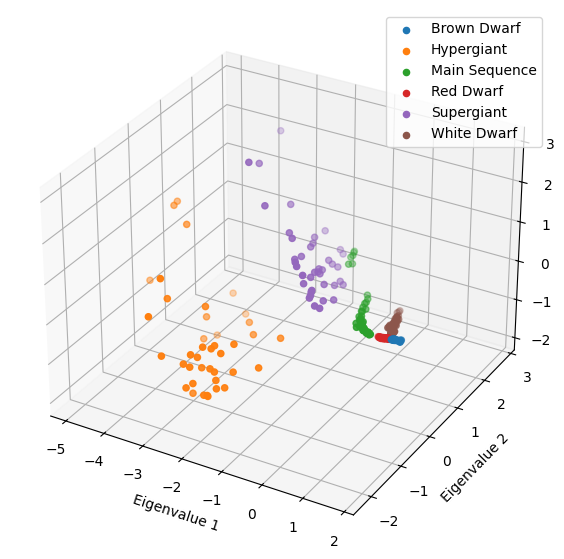

In [ ]:
fig = plt.figure(figsize=(10, 7))
# plotting a 3d projection of the results to see also the effect of the third feature
ax = fig.add_subplot(111, projection='3d')
for category in class_names:
    ax.scatter(stars_reduced[labels==category,0],stars_reduced[labels==category,1],stars_reduced[labels==category,2],c=[color_map[category]],label=category)
ax.set(xlabel='Eigenvalue 1', ylabel='Eigenvalue 2',zlabel='Eigenvalue 3')
ax.legend()
print('The first three components explain {:.2f}% of the variance'.format(evals.cumsum()[2]*100))